## Style Transfer

### Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

### Loading the pre-trained convolutional neural network(VGG19)

In [ ]:
network=tf.keras.applications.VGG19(include_top=False,weights='imagenet')

Here include_top is set to false as we don't need the dense layer.We only need theconvolutional and max pooling layer.And also the dataset we are using is imagenet consisting of 1000 images

In [ ]:
network.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(network.layers)

22

### Loading and pre-processing the images

### Content image

In [ ]:
!mkdir /content/my_new_folder

mkdir: cannot create directory ‘/content/my_new_folder’: File exists


In [ ]:
content_image=tf.keras.preprocessing.image.load_img('/content/my_new_folder/chaves.jpeg')

In [ ]:
plt.imshow(content_image)

In [ ]:
type(content_image)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
#converting to numpy format
content_image=tf.keras.preprocessing.image.img_to_array(content_image)

In [ ]:
type(content_image),content_image.shape,content_image.min(),content_image.max()

(numpy.ndarray, (448, 598, 3), 0.0, 255.0)

In [ ]:
#normalizing in the range from 0 to 1
content_image=content_image/255

In [ ]:
content_image.min(),content_image.max()

(0.0, 1.0)

In [ ]:
content_image

array([[[0.47843137, 0.6039216 , 0.8039216 ],
        [0.47843137, 0.6039216 , 0.8039216 ],
        [0.47843137, 0.6039216 , 0.8039216 ],
        ...,
        [0.38039216, 0.45882353, 0.5529412 ],
        [0.38039216, 0.45882353, 0.5529412 ],
        [0.38039216, 0.45882353, 0.5529412 ]],

       [[0.4862745 , 0.6117647 , 0.8117647 ],
        [0.4862745 , 0.6117647 , 0.8117647 ],
        [0.4862745 , 0.6117647 , 0.8117647 ],
        ...,
        [0.3882353 , 0.46666667, 0.56078434],
        [0.3882353 , 0.46666667, 0.56078434],
        [0.3882353 , 0.46666667, 0.56078434]],

       [[0.49019608, 0.6156863 , 0.8156863 ],
        [0.49019608, 0.6156863 , 0.8156863 ],
        [0.49019608, 0.6156863 , 0.8156863 ],
        ...,
        [0.3882353 , 0.4745098 , 0.5686275 ],
        [0.3882353 , 0.4745098 , 0.5686275 ],
        [0.3882353 , 0.4745098 , 0.5686275 ]],

       ...,

       [[0.7294118 , 0.8627451 , 1.        ],
        [0.7254902 , 0.85882354, 1.        ],
        [0.7254902 , 0

In [ ]:
#converting to batch format
content_image=content_image[tf.newaxis,:]

In [ ]:
content_image.shape

(1, 448, 598, 3)

### Style image

In [ ]:
style_image=tf.keras.preprocessing.image.load_img('/content/my_new_folder/tarsila_amaral.jpg')

In [ ]:
plt.imshow(style_image)

In [ ]:
style_image=tf.keras.preprocessing.image.img_to_array(style_image)

In [ ]:
style_image=style_image/255
style_image=style_image[tf.newaxis,:]
style_image.shape

(1, 560, 600, 3)

### Building the neural network

In [ ]:
content_layers=['block4_conv2']
style_layers=['block1_conv1','block2_conv1','block3_conv1','block4_conv1','block5_conv1']

The above mentioned layers are used for content extraction and style extraction.Usually,the content image points to 1 layer and style image points to 5 layers in VGG19 network

In [ ]:
num_content_layers=len(content_layers)
num_style_layers=len(style_layers)
print(num_content_layers,num_style_layers)

1 5


So there are 1 content layer and 5 style layers

In [ ]:
[network.get_layer(name).output for name in style_layers]

[<KerasTensor shape=(None, None, None, 64), dtype=float32, sparse=False, name=keras_tensor_23>,
 <KerasTensor shape=(None, None, None, 128), dtype=float32, sparse=False, name=keras_tensor_26>,
 <KerasTensor shape=(None, None, None, 256), dtype=float32, sparse=False, name=keras_tensor_29>,
 <KerasTensor shape=(None, None, None, 512), dtype=float32, sparse=False, name=keras_tensor_34>,
 <KerasTensor shape=(None, None, None, 512), dtype=float32, sparse=False, name=keras_tensor_39>]

In [ ]:
def vgg_layers(layer_names):
  vgg=tf.keras.applications.VGG19(include_top=False,weights='imagenet')
  vgg.trainable=False
  outputs=[vgg.get_layer(name).output for name in layer_names]
  network=tf.keras.Model(inputs=[vgg.input],outputs=outputs)
  return network

In [ ]:
#we are going to extract the style of style image
style_extractor=vgg_layers(style_layers)

In [ ]:
style_extractor.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,944,960 (49.38 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,944,960 (49.38 MB)

In [ ]:
style_extractor.outputs

[<KerasTensor shape=(None, None, None, 64), dtype=float32, sparse=False, name=keras_tensor_45>,
 <KerasTensor shape=(None, None, None, 128), dtype=float32, sparse=False, name=keras_tensor_48>,
 <KerasTensor shape=(None, None, None, 256), dtype=float32, sparse=False, name=keras_tensor_51>,
 <KerasTensor shape=(None, None, None, 512), dtype=float32, sparse=False, name=keras_tensor_56>,
 <KerasTensor shape=(None, None, None, 512), dtype=float32, sparse=False, name=keras_tensor_61>]

So there are 5 outputs

In [ ]:
style_outputs=style_extractor(style_image)

In [ ]:
len(style_outputs)

5

In [ ]:
style_outputs[0]

<tf.Tensor: shape=(1, 560, 600, 64), dtype=float32, numpy=
array([[[[0.0000000e+00, 1.0877684e-01, 6.1876789e-02, ...,
          4.7548783e-01, 4.9462211e-01, 1.5644574e-01],
         [0.0000000e+00, 2.0908591e-01, 3.7850654e-01, ...,
          1.7786777e-01, 1.4868841e+00, 1.1423521e+00],
         [0.0000000e+00, 2.0027557e-01, 3.8594389e-01, ...,
          1.3720292e-01, 1.5296972e+00, 1.1784816e+00],
         ...,
         [0.0000000e+00, 3.3374479e-01, 5.1606625e-01, ...,
          0.0000000e+00, 1.6996145e+00, 1.3344207e+00],
         [0.0000000e+00, 3.4465253e-01, 5.2247036e-01, ...,
          0.0000000e+00, 1.7055959e+00, 1.3397942e+00],
         [7.8262198e-01, 4.2381790e-01, 7.7576441e-01, ...,
          4.4776672e-01, 2.4687252e+00, 2.3798752e+00]],

        [[0.0000000e+00, 1.1056375e-01, 0.0000000e+00, ...,
          8.2489014e-02, 0.0000000e+00, 0.0000000e+00],
         [6.3421291e-01, 2.3642045e-01, 3.5782573e-01, ...,
          0.0000000e+00, 5.8060557e-01, 7.0158613e-01

All these value represent the activation value of first layer

In [ ]:
style_outputs[0].shape,style_outputs[1].shape,style_outputs[2].shape,style_outputs[3].shape,style_outputs[4].shape

(TensorShape([1, 560, 600, 64]),
 TensorShape([1, 280, 300, 128]),
 TensorShape([1, 140, 150, 256]),
 TensorShape([1, 70, 75, 512]),
 TensorShape([1, 35, 37, 512]))

The last parameter represents the number of filters

In [ ]:
def gram_matrix(layer_activation):
  result=tf.linalg.einsum('bijc,bijd->bcd',layer_activation,layer_activation)
  input_shape=tf.shape(layer_activation)
  num_locations=tf.cast(input_shape[1]*input_shape[2],tf.float32) #inorder to get the shape of the image
  return result/num_locations #it's a way of normalizing the values

This function is user to calculate the loss between generated image and style image

In [ ]:
gram_matrix(style_outputs[0])

<tf.Tensor: shape=(1, 64, 64), dtype=float32, numpy=
array([[[0.6309869 , 0.28931645, 0.28516006, ..., 0.10537568,
         0.36958697, 0.45012602],
        [0.28931645, 0.24121168, 0.18381073, ..., 0.03157695,
         0.19594134, 0.21715751],
        [0.28516006, 0.18381073, 0.16743268, ..., 0.02779872,
         0.19410346, 0.22709452],
        ...,
        [0.10537568, 0.03157695, 0.02779872, ..., 0.08297459,
         0.06948006, 0.06642949],
        [0.36958697, 0.19594134, 0.19410346, ..., 0.06948006,
         0.2868264 , 0.3185406 ],
        [0.45012602, 0.21715751, 0.22709452, ..., 0.06642949,
         0.3185406 , 0.37468514]]], dtype=float32)>

In [ ]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self,style_layers,content_layers):
    super().__init__()
    self.vgg=vgg_layers(style_layers+content_layers)
    self.style_layers=style_layers
    self.content_layers=content_layers
    self.num_style_layers=len(style_layers)
    self.vgg.trainable=False #we are not going to train the model
  def call(self,inputs):
    inputs=inputs*255.0 #Denormalizing the values
    preprocessed_input=tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs=self.vgg(preprocessed_input)
    style_outputs=outputs[:self.num_style_layers]
    content_outputs=outputs[self.num_style_layers:]
    style_outputs=[gram_matrix(style_output) for style_output in style_outputs]
    content_dict={content_name:value for content_name,value in zip(self.content_layers,content_outputs)} #to get the name of content layer and the activation values
    style_dict={style_name:value for style_name,value in zip(self.style_layers,style_outputs)}# to get the name of style layers and their activation values
    return {'content':content_dict,'style':style_dict}


In [ ]:
extractor=StyleContentModel(style_layers,content_layers)

In [ ]:
results=extractor(content_image)

By executing the above line the content image is sent to the neural network and we will get the activation values of all 6 layers

In [ ]:
results

{'content': {'block4_conv2': <tf.Tensor: shape=(1, 56, 74, 512), dtype=float32, numpy=
  array([[[[  17.334719 ,    0.       ,    0.       , ...,  574.69446  ,
               0.       ,    0.       ],
           [   0.       ,    0.       ,    0.       , ...,  291.73846  ,
             132.49028  ,    0.       ],
           [   0.       ,    0.       ,    0.       , ...,  333.45633  ,
             117.719406 ,    0.       ],
           ...,
           [ 692.7539   ,    0.       ,    0.       , ..., 1512.0809   ,
              10.164166 ,  321.67062  ],
           [ 139.49515  ,    0.       ,    0.       , ..., 1108.5734   ,
             102.29353  ,  179.42471  ],
           [ 152.06615  ,    0.       ,    0.       , ...,  471.31967  ,
             179.42262  ,  671.0475   ]],
  
          [[   0.       ,    0.       ,    0.       , ...,  548.79645  ,
               0.       ,    0.       ],
           [   0.       ,    0.       ,    0.       , ...,   43.47367  ,
               0.     

In [ ]:
for key,value in results.items():
  print(key,value.keys())

content dict_keys(['block4_conv2'])
style dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [ ]:
style_targets=extractor(style_image)['style']
content_targets=extractor(content_image)['content']

In [ ]:
len(style_targets),len(content_targets)

(5, 1)

In [ ]:
new_image=tf.Variable(content_image)

In [ ]:
content_weight=1
style_weight=1000

These weights specifies the amount of content and amount of style we want in the final result

The higher the weight of the content , the greater the preservation of the content of the original image

The higher the weight of style, the greater the application of the style in the original image

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.02)

### Training

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
plt.imshow(tf.squeeze(content_image,axis=0))

In [ ]:
epochs = 200
print_every = 25  # Print results every 500 epochs
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        outputs = extractor(new_image)
        content_outputs = outputs['content']
        style_outputs = outputs['style']

        # Compute content loss
        content_loss = tf.add_n(
            [tf.reduce_mean((content_outputs[name] - content_targets[name]) ** 2)
             for name in content_outputs.keys()]
        )

        # Compute style loss
        style_loss = tf.add_n(
            [tf.reduce_mean((style_outputs[name] - style_targets[name]) ** 2)
             for name in style_outputs.keys()]
        )

        # Combine losses
        total_loss = (content_loss * content_weight / num_content_layers +
                      style_loss * style_weight / num_style_layers)

    # Compute gradients and update image
    gradients = tape.gradient(total_loss, new_image)
    optimizer.apply_gradients([(gradients, new_image)])  # Update the pixels of the image

    # Clip the image values to the range [0, 1]
    new_image.assign(tf.clip_by_value(new_image, 0.0, 1.0))

    # Print progress every `print_every` epochs
    if (epoch + 1) % print_every == 0:
        print('Epoch {} | Content Loss: {:.4f} | Style Loss: {:.4f} | Total Loss: {:.4f}'.format(
            epoch + 1, content_loss, style_loss, total_loss
        ))

        plt.imshow(tf.squeeze(new_image,axis=0))
        plt.show()

### Visualizing the images

(-0.5, 599.5, 559.5, -0.5)

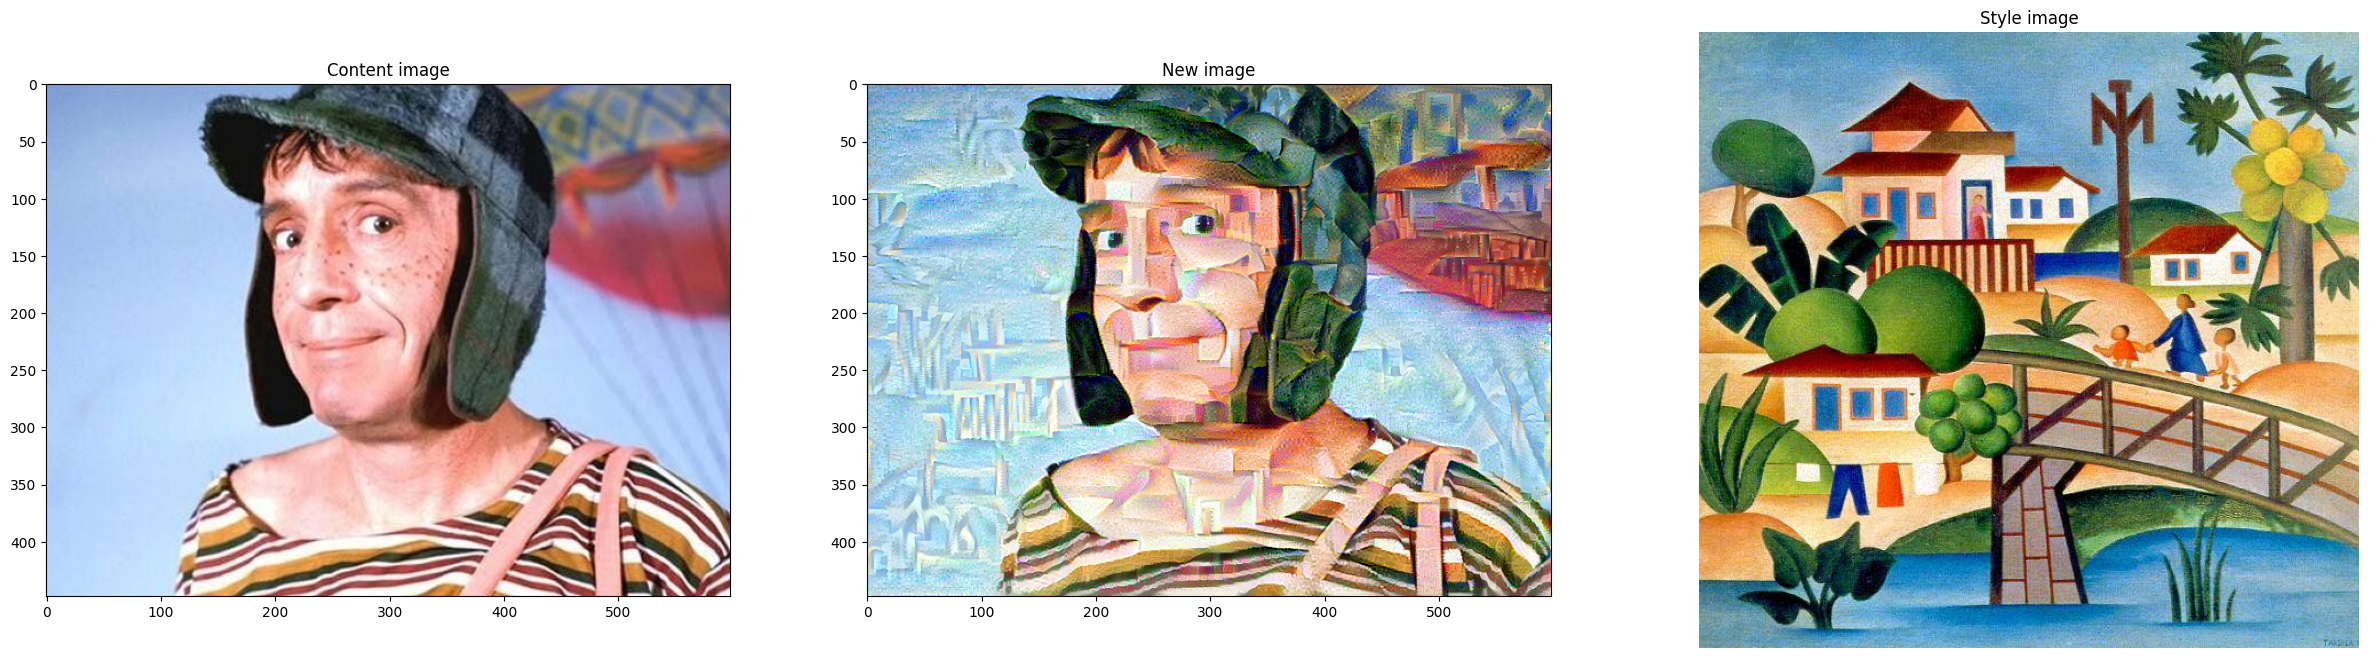

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(30,8))
ax1.imshow(tf.squeeze(content_image,axis=0))
ax1.set_title('Content image')
ax2.imshow(tf.squeeze(new_image,axis=0))
ax2.set_title('New image')
ax3.imshow(tf.squeeze(style_image,axis=0))
ax3.set_title('Style image')
plt.axis('off')